In [82]:
from collections import namedtuple
from dataclasses import dataclass
from functools import reduce
from heapq import heappush, heappop
from math import floor, ceil
from pprint import pprint as print
import numpy as np


DDOF = 1

def correlation(arr0, arr1, ddof=DDOF):
    return covariance(arr0, arr1, ddof=ddof) / (stdev(arr0) * stdev(arr1))

def counter(arr):
    res = {}
    for val in arr:
        res[val] = res.get(val, 0) + 1
    return res

def covariance(arr0, arr1, ddof=DDOF):
    
    if len(arr0) != len(arr1):
        raise ValueError(f'Lengths of arrays {arr0} and {arr1} must be the same.')
    arr0_mean = mean(arr0)
    arr1_mean = mean(arr1)
    return (sum(tuple((arr0_elm - arr0_mean)*(arr1_elm - arr1_mean) 
                      for arr0_elm, arr1_elm in zip(arr0, arr1))) / (len(arr0) - ddof))

def cov_mat(*arrays, ddof=DDOF):
    res = [[None for _ in range(len(arrays))] for _ in range(len(arrays))]
    
    for i in range(len(arrays)):
        for j in range(len(arrays)):
            if res[i][j] is None:
                res[i][j] = covariance(arrays[i], arrays[j])
                print(f'{i} {j}')
                print(res)
                #res[i][j] = res[j][i]
    return res
    
def mean_(arr):
    return sum(arr) / len(arr)

def mean(arr):
    return reduce(lambda x,y: x+y, arr, 0) / len(arr)

def median(arr):
    if not len(arr):
        return
    sorted_arr = sorted(arr)
    mid = len(arr) / 2 - .5
    return mean((sorted_arr[floor(mid)],sorted_arr[ceil(mid)]))

def mode(arr):
    counts = counter(arr) #Counter(arr)
    Count = namedtuple('Count', 'elm count')
    maxes = [Count(None, float('-inf'))]

    for elm, count in counts.items():
        if count == maxes[0].count:
            maxes.append(Count(elm, count))
        elif count > maxes[0].count:
            maxes = [Count(elm, count)]
    #return tuple(count.elm for count in maxes)
    return maxes[0].count

def variance(arr, ddof=DDOF):
    _mean = mean(arr)
    return reduce(lambda x,y: x + (y - _mean)**2, arr, 0) / (len(arr) - ddof)

def vector_add(arr0, arr1):
    for x,y in zip(arr0, arr1):
        yield x+y

def stdev(arr, ddof=DDOF):
    return variance(arr, ddof=ddof)**.5

class Spread:
    @staticmethod
    def range(arr):
        return max(arr) - min(arr)

class OnlineMedian:
    
    def __init__(self):
        self.min_heap = []
        self.max_heap = []
    
    def add(self, elm):
        
        if not len(self.max_heap):
            self.max_heap.append(-elm)
            return
        heappush(self.max_heap, -elm) if elm < -self.max_heap[0] else heappush(self.min_heap, elm)
        
        if len(self.max_heap) - len(self.min_heap) > 1:
            heappush(self.min_heap, -heappop(self.max_heap))
        elif len(self.min_heap) - len(self.max_heap) > 1:
            heappush(self.max_heap, -heappop(self.min_heap))
            
    @property
    def median(self):
        
        if len(self.max_heap) == len(self.min_heap):
            if len(self.max_heap) == 0:
                return
            return (-self.max_heap[0] + self.min_heap[0]) / 2
        elif len(self.max_heap) > len(self.min_heap):
            return -self.max_heap[0]
        return self.min_heap[0]

In [39]:
arr = (1,4,4,123,345,4,213,34,2,897,4)
assert mean_(arr) == mean(arr)
assert mode(arr) == 4 #(4,)
online_median = OnlineMedian()

for num in arr:
    online_median.add(num)

assert online_median.median == median(arr)

arr = (1, 1, 1, 2, 2, 2)
assert mode(arr) == 3 #(1,2)

online_median = OnlineMedian()

for num in arr:
    online_median.add(num)
assert online_median.median == 1.5

##### test variance

In [ ]:
from numpy import var


##### test standard deviation

In [30]:
from numpy import std
arr = (42,435,234,2,32,454,6)
assert std(arr) == stdev(arr)
assert std(arr, ddof=1) == stdev(arr, ddof=1)

In [37]:
def describe(arr):
    print(f'    mean: {mean(arr)}\n'
          f'  median: {median(arr)}\n'
          f'    mode: {mode(arr)}\n'
          f'variance: {variance(arr, ddof=1)}\n'
          f'   stdev: {stdev(arr, ddof=1)}')
city_a = [29,28,32,35,36]
city_b = [12,18,30,45,55]
city_c = [32, 32, 32, 32, 32]

print('a')
describe(city_a)
print('b')
describe(city_b)
print('c')
describe(city_c)

a
    mean: 32.0
  median: 32.0
    mode: 1
variance: 12.5
   stdev: 3.5355339059327378
b
    mean: 32.0
  median: 30.0
    mode: 1
variance: 324.5
   stdev: 18.01388353465182
c
    mean: 32.0
  median: 32.0
    mode: 5
variance: 0.0
   stdev: 0.0


In [53]:
class Line:
    def __init__(self, slope, y_intercept):
        self.slope = slope
        self.y_intercept = y_intercept
        
    def y(self, x):
        return self.slope*x + self.y_intercept
    
# Running Distance in Mile
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])

# Water Drinks in Litre
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

line = Line(.25163494, .79880123)
Y_ = np.array([line.y(x) for x in X])

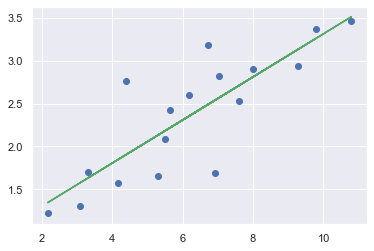

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
plt.scatter(X, Y)
plt.plot(X, Y_, 'g-')

In [56]:
mse = lambda actual, expected: mean([(y - y_)**2 for y, y_ in zip(actual, expected)])
mse(Y, Y_)

0.15385767404191164

### percentile

In [91]:
data = sorted(city_a + city_b + city_c)
percentile_val = lambda data, p: data[int(np.ceil((p / 100) * len(data)))]

##### test percentile

In [94]:
def check_percentile(arr, val, percentile):
    num_elms_less_than_val = sum(1 for x in arr if x < val)
    actual = np.ceil(num_elms_less_than_val / len(arr))
    return actual == np.ceil(percentile / 100)
assert check_percentile(data, percentile_val(data, 70), 70)

In [99]:
num_females = 61
female_avg = 28.34
num_males = 69
male_avg = 32.99
total = num_females + num_males

mean(((num_females/total)*female_avg, (num_males/total)*male_avg)) * 2

30.808076923076925

##### test covariance

In [107]:
X = (1, 1, 1, 1)
Y = (1, 2, 3, 4)
Z = (1, 1, 2, 3)

assert round(covariance(Y, Z, ddof=1), 5) == 1.16667
assert variance(X) == covariance(X, X)
assert variance(Y) == covariance(Y, Y)
assert variance(Z) == covariance(Z, Z)

def recur_round(arr, dec_places=0):
    if all(isinstance(elm, float) for elm in arr):
        # Everything in arr is int
        return tuple(round(elm, dec_places) for elm in arr)
    elif all(isinstance(elm, (tuple, list)) for elm in arr):
        # Everything in arr is either tuple or list
        return tuple(recur_round(_arr) for _arr in arr)
    return tuple(arr) # Return original otherwise

assert recur_round(cov_mat(X, Y, Z), 3) == ((0, 0, 0), (0, 1.667, 1.167), (0, 1.167, 0.917))

'0 0'
[[0.0, None, None], [None, None, None], [None, None, None]]
'0 1'
[[0.0, 0.0, None], [None, None, None], [None, None, None]]
'0 2'
[[0.0, 0.0, 0.0], [None, None, None], [None, None, None]]
'1 0'
[[0.0, 0.0, 0.0], [0.0, None, None], [None, None, None]]
'1 1'
[[0.0, 0.0, 0.0], [0.0, 1.6666666666666667, None], [None, None, None]]
'1 2'
[[0.0, 0.0, 0.0],
 [0.0, 1.6666666666666667, 1.1666666666666667],
 [None, None, None]]
'2 0'
[[0.0, 0.0, 0.0],
 [0.0, 1.6666666666666667, 1.1666666666666667],
 [0.0, None, None]]
'2 1'
[[0.0, 0.0, 0.0],
 [0.0, 1.6666666666666667, 1.1666666666666667],
 [0.0, 1.1666666666666667, None]]
'2 2'
[[0.0, 0.0, 0.0],
 [0.0, 1.6666666666666667, 1.1666666666666667],
 [0.0, 1.1666666666666667, 0.9166666666666666]]


AssertionError: 

In [109]:
recur_round([[0.0, 0.0, 0.0],
 [0.0, 1.6666666666666667, 1.1666666666666667],
 [0.0, 1.1666666666666667, 0.9166666666666666]], 4)

((0.0, 0.0, 0.0), (0.0, 2.0, 1.0), (0.0, 1.0, 1.0))

In [79]:
# Running Distance in Mile
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])

# Water Drinks in Litre
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])


0.8323917528894436

In [81]:
covariance(X,Y) / correlation(X, Y)

1.7607236855873312